In [1]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

# URL of the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Define column names since the dataset does not include headers
column_names = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df = df.drop("Sample code number", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
print(df['Class'].unique())

[2 4]


In [9]:
df = df.replace('?', np.nan)
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
y = df['Class']
X = df.drop('Class', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4,random_state=42)

In [13]:
def acc_plot(cross_val_scores):
  mean_accuracy = np.mean(cross_val_scores)
  plt.figure(figsize=(8, 6))
  plt.plot(cross_val_scores, marker='o', linestyle='-')
  plt.xlabel('Cross-Validation Fold')
  plt.ylabel('Accuracy')
  plt.title(f'Mean Accuracy: {mean_accuracy:.2f}')
  plt.grid(True)
  plt.show()

In [14]:
def box_plot(results, names):
  plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
  plt.boxplot(results, labels=names, showmeans=True)
  plt.title('Model Performance Comparison')
  plt.xlabel('Number of Trees (n_estimators)')
  plt.ylabel('Accuracy')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [15]:
def line_plot(results,names):
  means = [np.mean(scores) for scores in results]

  plt.figure(figsize=(10, 6))
  plt.plot(names, means, marker='o', linestyle='-')
  plt.title('Accuracy vs. Number of Trees')
  plt.xlabel('Number of Trees (n_estimators)')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

#### SVM

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Initialize the SVC classifier
svc = SVC(random_state=13)

# Define a random grid of hyperparameters to search
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel function
    'degree': [2, 3, 4],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'shrinking': [True, False],  # Whether to use shrinking heuristic
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, random_state=13)

# Perform the randomized search on your training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'shrinking': True, 'kernel': 'rbf', 'gamma': 0.001, 'degree': 3, 'C': 10}


In [51]:
# Get the best model from the randomized search
best_svc = random_search.best_estimator_

In [52]:
# Initialize StratifiedKFold for k-fold cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
accuracies = []

# Perform k-fold cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
    X_val_fold, y_val_fold = X.iloc[val_idx], y.iloc[val_idx]

    # Train the best SVC classifier on the training fold
    best_svc.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = best_svc.predict(X_val_fold)

    # Calculate accuracy for the current fold
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy_fold)

    # Print accuracy for the current fold
    print(f"Fold {fold_idx + 1} Accuracy: {accuracy_fold:.6f}")

Fold 1 Accuracy: 0.970803
Fold 2 Accuracy: 0.963504
Fold 3 Accuracy: 0.978102
Fold 4 Accuracy: 0.963235
Fold 5 Accuracy: 0.970588


In [53]:
# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy (k-fold cross-validation): {mean_accuracy:.6f}")

Mean Accuracy (k-fold cross-validation): 0.969246


In [54]:
# Train the best model on the entire training set
best_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svc.predict(X_test)

# Generate a classification report for the test set
report = classification_report(y_test, y_pred,digits=6)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           2   0.955307  0.982759  0.968839       174
           4   0.968421  0.920000  0.943590       100

    accuracy                       0.959854       274
   macro avg   0.961864  0.951379  0.956214       274
weighted avg   0.960093  0.959854  0.959624       274



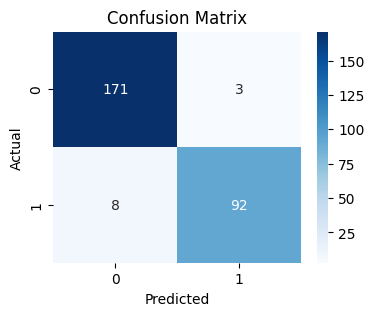

In [55]:
# Calculate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()